In [23]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_path = '/content/drive/MyDrive/intern/ml.xlsx - Sheet1.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
df

,Bandgap,Electron affinity,Acceptor density,CB effective DOS,VB effective DOS,Defect density,Thickness,Dielectric permittivity,PCE
0,1.30,4.15,1.000000e+15,1.000000e+17,5.000000e+17,1.000000e+12,0.5,8.0,36.6000
1,1.30,4.15,1.000000e+15,1.000000e+17,5.000000e+17,1.000000e+12,0.5,12.0,36.5000
2,1.30,4.15,1.000000e+15,1.000000e+17,5.000000e+17,1.000000e+12,1.0,8.0,38.6000
3,1.30,4.15,1.000000e+15,1.000000e+17,5.000000e+17,1.000000e+12,1.0,12.0,38.5000
4,1.30,4.15,1.000000e+15,1.000000e+17,5.000000e+17,1.000000e+14,0.5,8.0,31.0000
...,...,...,...,...,...,...,...,...,...
735,1.55,4.40,5.000000e+18,5.000000e+19,1.000000e+20,1.000000e+13,1.7,18.0,2.5800
736,1.55,4.40,5.000000e+18,5.000000e+19,1.000000e+20,1.000000e+17,0.7,14.0,0.1240
737,1.55,4.40,5.000000e+18,5.000000e+19,1.000000e+20,1.000000e+17,0.7,18.0,0.0945
738,1.55,4.40,5.000000e+18,5.000000e+19,1.000000e+20,1.000000e+17,1.7,14.0,0.1230


In [25]:

from sklearn.linear_model import LinearRegression


for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:  # Numerical data
        df[column].fillna(df[column].mean(), inplace=True)

df = pd.get_dummies(df, drop_first=True)

X = df.drop('PCE', axis=1)
y = df['PCE']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42) # 60% train, 40% temp
X_test, X_sel, y_test, y_sel = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) # 20% test, 20% selection

# Step 5: Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_sel = scaler.transform(X_sel)

# Step 6: Train the Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Step 7: Predict on train, test, and selection data
y_train_pred = rf_reg.predict(X_train)
y_test_pred = rf_reg.predict(X_test)
y_sel_pred = rf_reg.predict(X_sel)

# Step 8: Calculate MSE, RMSE, and R² for training, testing, and selection sets
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2

train_mse, train_rmse, train_r2 = calculate_metrics(y_train, y_train_pred)
test_mse, test_rmse, test_r2 = calculate_metrics(y_test, y_test_pred)
sel_mse, sel_rmse, sel_r2 = calculate_metrics(y_sel, y_sel_pred)

# Step 9: Print the results
print("Training MSE:", train_mse)
print("Training RMSE:", train_rmse)
print("Training R²:", train_r2)

print("\nTesting MSE:", test_mse)
print("Testing RMSE:", test_rmse)
print("Testing R²:", test_r2)

print("\nSelection MSE:", sel_mse)
print("Selection RMSE:", sel_rmse)
print("Selection R²:", sel_r2)

Training MSE: 0.2790208138941561
Training RMSE: 0.5282242079781616
Training R²: 0.9979392964693278

Testing MSE: 1.766620401415313
Testing RMSE: 1.3291427317693585
Testing R²: 0.988043297906509

Selection MSE: 2.1598228910510917
Selection RMSE: 1.469633590746718
Selection R²: 0.9857243583526123


In [26]:
pip install pandas scikit-learn


In [27]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Step 7: Predict on train and test data
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

# Step 8: Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train R²:", train_r2)
print("Test R²:", test_r2)



Train MSE: 27.200070103476126
Test MSE: 23.58844221843548
Train R²: 0.7991143394842628
Test R²: 0.840350549427934


In [28]:
!mkdir -p /mnt/data

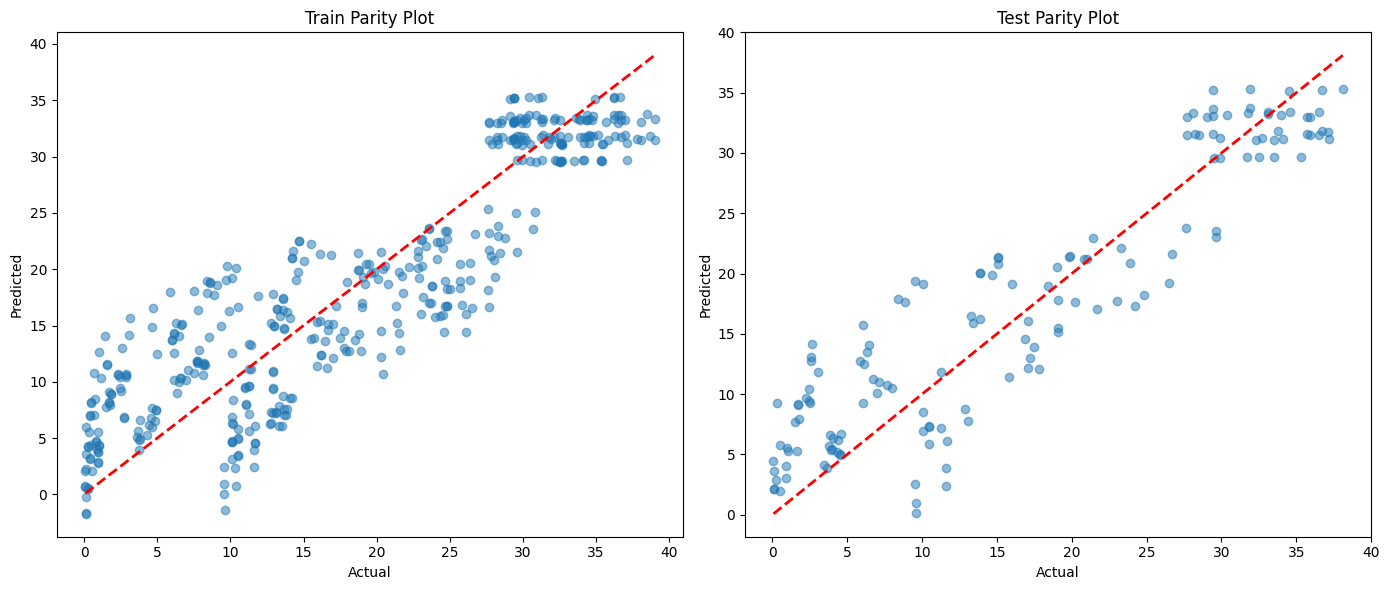

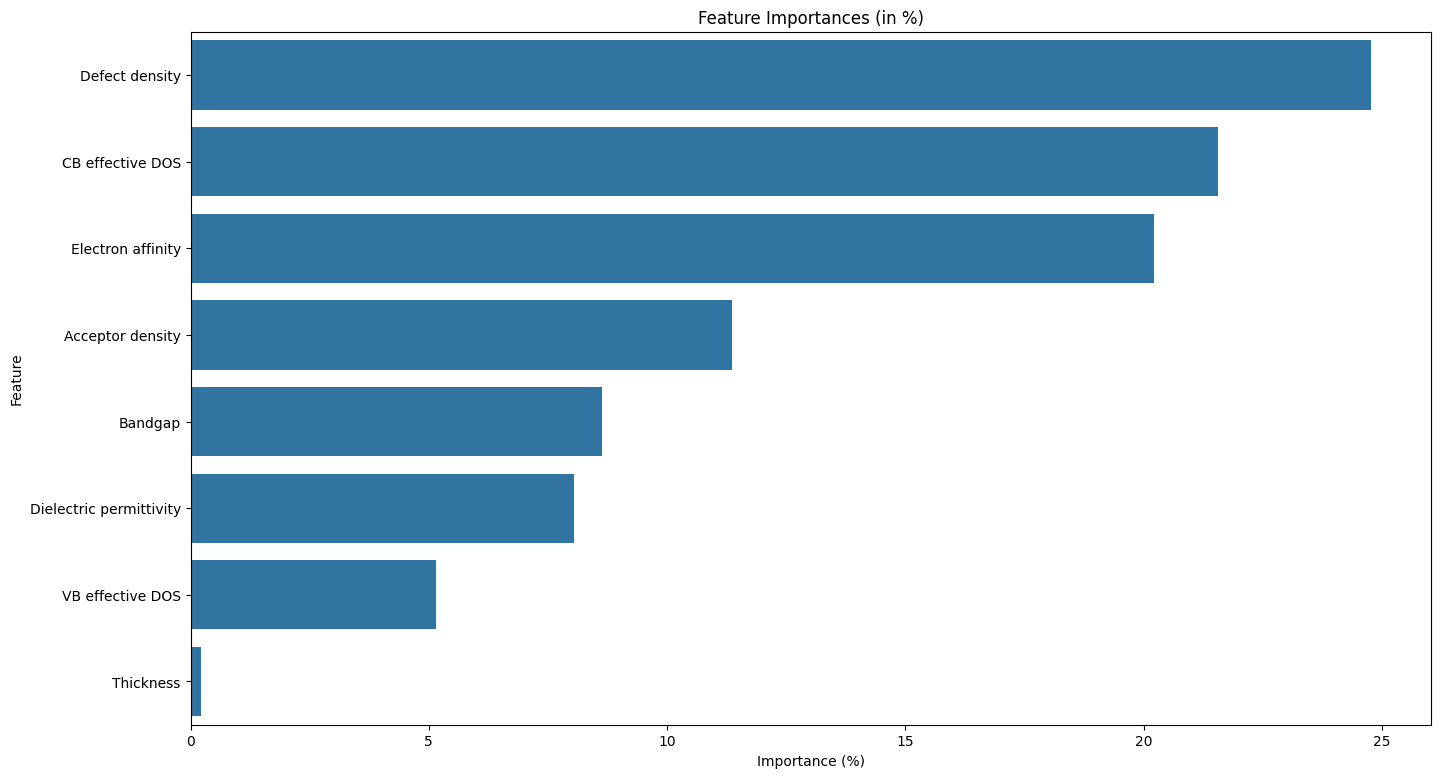

Table: Relative Strengths of Importance Indices and Correlations
                   Feature  Relative Importance (%)  Correlation with Target
1        Electron affinity                28.719547                -0.684930
5           Defect density                24.694459                -0.527431
2         Acceptor density                16.743477                -0.353310
3         CB effective DOS                16.532811                -0.604694
7  Dielectric permittivity                 9.660148                -0.679819
0                  Bandgap                 2.973679                -0.526259
6                Thickness                 0.436248                -0.483915
4         VB effective DOS                 0.239631                -0.268149


In [32]:
from sklearn.inspection import permutation_importance


# Step 9: Plot parity plots for train and test data side by side
plt.figure(figsize=(14, 6))

# Train parity plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Train Parity Plot')

# Test parity plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Parity Plot')

plt.tight_layout()
plt.savefig('/content/drive/My Drive/parity_plots.tiff', dpi=300, format='tiff')
plt.show()

# Step 10: Calculate and plot feature importances in percentage
feature_importances = np.abs(lin_reg.coef_)
feature_importance_percentage = 100 * (feature_importances / feature_importances.sum())
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance (%)': feature_importance_percentage
})
feature_importance_df = feature_importance_df.sort_values(by='Importance (%)', ascending= False)

plt.figure(figsize=(16, 9))
sns.barplot(x='Importance (%)', y='Feature', data=feature_importance_df)
plt.title('Feature Importances (in %)')
plt.savefig('/content/drive/My Drive/feature_importance.tiff', dpi=300, format='tiff')
plt.show()


perm_importance = permutation_importance(rf_reg, X_test, y_test, n_repeats=10, random_state=42)
importance = perm_importance.importances_mean
features = X.columns
feature_importance_table = pd.DataFrame({
    'Feature': features,
    'Relative Importance (%)': importance_percentage,
    'Correlation with Target': [np.corrcoef(df[feature], y)[0, 1] for feature in features]
})

# Sort the table by Relative Importance
feature_importance_table = feature_importance_table.sort_values(by='Relative Importance (%)', ascending=False)

print("Table: Relative Strengths of Importance Indices and Correlations")
print(feature_importance_table)

# Optionally, save the table to a CSV file
feature_importance_table.to_csv('/content/drive/My Drive/feature_importance_table.csv', index=False)



In [30]:
!pip install shap
import shap

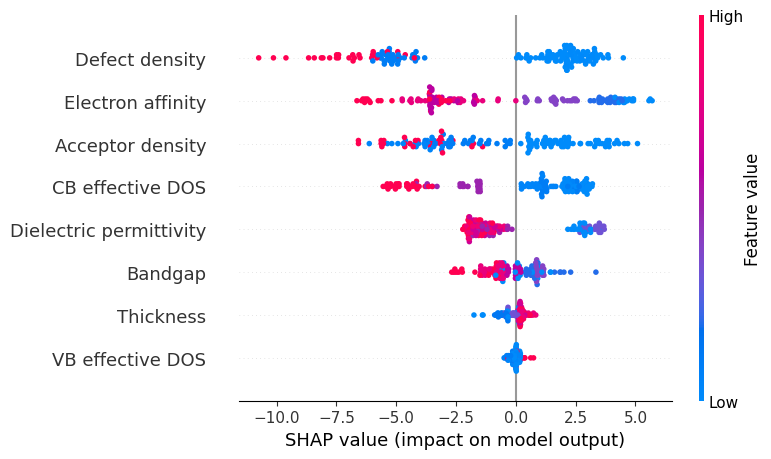

In [31]:
from sklearn.ensemble import RandomForestRegressor

features_sequence = [
    "Bandgap",
    "Electron affinity",
    "Acceptor density",
    "CB effective DOS",
    "VB effective DOS",
    "Defect density",
    "Thickness",
    "Dielectric permittivity"
]

# Ensure the DataFrame only includes these features in the specified order
X = df[features_sequence]


rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Step 6: Use SHAP to explain the model's predictions
explainer = shap.Explainer(rf_reg, X_train, feature_names=features_sequence)
shap_values = explainer(X_test)

# Step 7: Plot the SHAP summary plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, feature_names=features_sequence, show=False)
plt.savefig('/content/drive/My Drive/shap-plot.tiff', dpi=300, format='tiff', bbox_inches='tight')
plt.show()